# Met API helpers

This notebook defines some API helpers for working with the [Metropolitan Museum of Art's API](https://metmuseum.github.io/).

author: Jake Kara <jake@jakekara.com>

## Overview

In this notebook we will learn how to annotate a Jupyter Notebook with margin notes so that it is more useful when being imported as a Python module.

One of the things that makes notebooks great is that we can use them tow write exploratory code, or demonstrate the output of our work. But that also means they often contain code that is not reusable. This notebook includes some cells that define reusable functions, as well as run-once cells that demonstrate how those functions work. While we want to be able to import the reusable code elsewhere, we want to be able to exclude the demo cells.

We will learn about several Margo directives that have special meaning to the Margo Loader library, and they tell it how this notebook should be imported.

Oh, and the first cell in the notebook — the one before this one — it's special. Because it's the first cell *and* it's a Markdown cell, its entire contents will be used as the notebook's help text, which, in Python is called `__docstring__`.

To see how this notebook works when it's imported, check out [Importing Notebooks.ipynb](./Importing%20Notebooks.ipynb).

## Import dependencies

In [1]:
import requests
import json
import os

## Define some constants

Define some constants we will use throughout this notebook.

In [2]:
ENDPOINT = "https://collectionapi.metmuseum.org/public/collection/v1"

## Perform a search

Wrap the Met API's [search](https://metmuseum.github.io/#search) endpoint.

In [3]:
def do_search(term):
    
    """
    Perform a basic text search and return a list of object IDs.
    
    Warning: This function has no error handling, so if anything
    goes wrong, then it will crash.
    """
    
    url = f"{ENDPOINT}/search"
    data = {
        "q": term
    }
    response = requests.get(url, params=data)
    
    return response.json()['objectIDs']

In [4]:
# Use the `ignore-cell` directive to prevent this cell from being imported
# by any Python module/script or Jupyter Notebook that imports this notebook.

# :: ignore-cell :: 

search_results = do_search("Starry Night Van Gogh")
print(json.dumps(search_results, indent=2))

[
  436535,
  437998,
  437980,
  436536,
  436534,
  436524,
  436526,
  436176,
  766683,
  766687,
  339760,
  436122,
  437654,
  435773,
  337833,
  437381,
  438821,
  436954
]


## Get an object metadata

Create a wrapper for the [object](https://metmuseum.github.io/#object) endpoint.

In [5]:
def get_object_metadata(object_id):
    
    """
    Get metadata for an object.
    
    Warning: This function has no error handling, so if anything
    goes wrong, then it will crash.    
    """
    
    url = f"{ENDPOINT}/objects/{object_id}"
    
    return requests.get(url).json()

In [6]:
# Use the stop-module directive since we're going to do a bit of live coding

# :: stop-module ::

metadata = get_object_metadata(search_results[0])
print(json.dumps(metadata, indent=2))

{
  "objectID": 436535,
  "isHighlight": true,
  "accessionNumber": "1993.132",
  "accessionYear": "1993",
  "isPublicDomain": true,
  "primaryImage": "https://images.metmuseum.org/CRDImages/ep/original/DT1567.jpg",
  "primaryImageSmall": "https://images.metmuseum.org/CRDImages/ep/web-large/DT1567.jpg",
  "additionalImages": [
    "https://images.metmuseum.org/CRDImages/ep/original/LC-EP_1993_132_suppl_CH-004.jpg",
    "https://images.metmuseum.org/CRDImages/ep/original/LC-EP_1993_132_suppl_CH-003.jpg",
    "https://images.metmuseum.org/CRDImages/ep/original/LC-EP_1993_132_suppl_CH-002.jpg",
    "https://images.metmuseum.org/CRDImages/ep/original/LC-EP_1993_132_suppl_CH-001.jpg"
  ],
  "constituents": [
    {
      "constituentID": 161947,
      "role": "Artist",
      "name": "Vincent van Gogh",
      "constituentULAN_URL": "http://vocab.getty.edu/page/ulan/500115588",
      "constituentWikidata_URL": "https://www.wikidata.org/wiki/Q5582",
      "gender": ""
    }
  ],
  "department":

In [7]:
metadata = [get_object_metadata(oid) for oid in search_results]

In [8]:
images = [requests.get(m["primaryImageSmall"]).content for m in metadata]

In [9]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from io import BytesIO

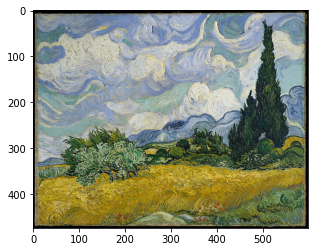

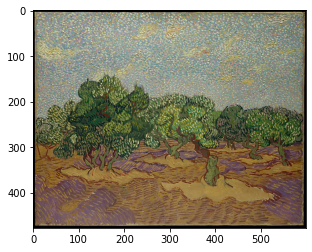

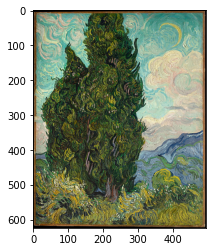

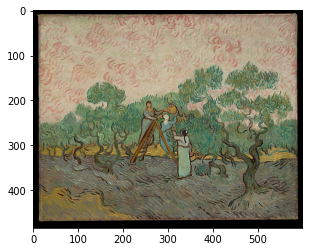

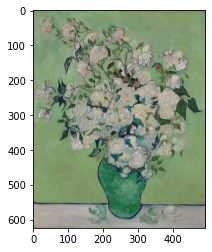

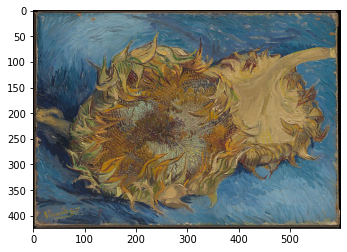

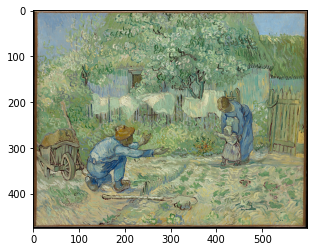

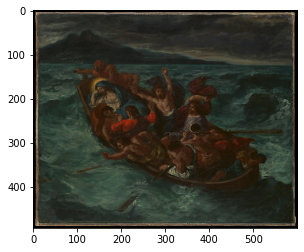

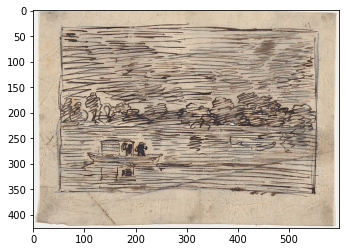

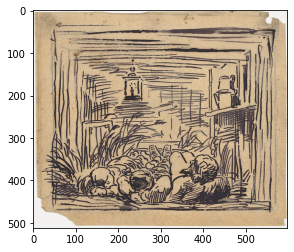

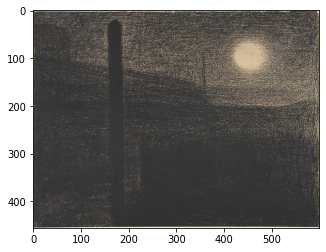

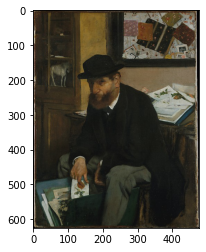

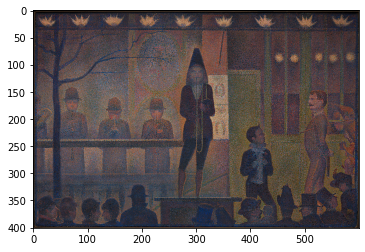

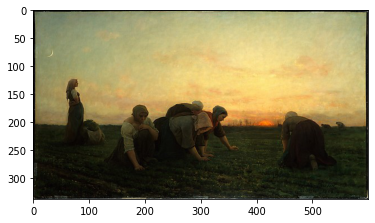

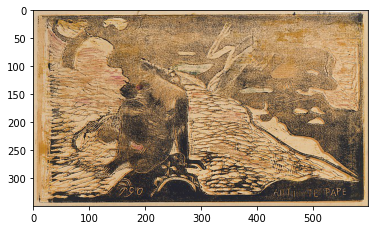

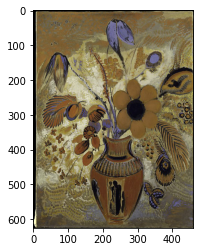

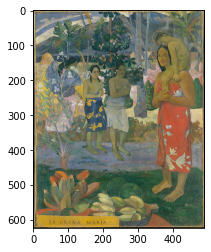

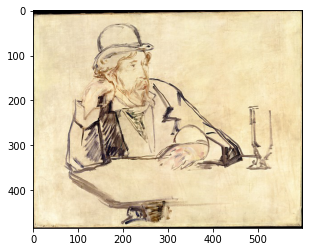

In [10]:
for img in images:
    f = BytesIO()
    f.write(img)
    plt.figure()
    plt.imshow(mpimg.imread(f, format="jpeg"))

## Write some metadata processors

Let's write some functions that tell us important information about a metadata object. 

We will often want to know if the item is in the public domain, so we will make a function called `is_public_domain` that takes the entire metadata object as a paramter and returns a `boolean`. Next we will define a function called `download_image` that also takes an entire metadata object and returns the bytes that make up that image, as well as its filename.

But first, since we issued a `stop-module` previously, we need to issue a `start-module` for this and future cells to be included when this notebook is imported.

In [11]:
# :: start-module ::

### Define is_public_domain

In [12]:
def is_public_domain(meta_object):
    
    """
    Determine if object is in the public domain
    
    Warning: This function has no error handling, so if anything
    goes wrong, then it will crash.    
    """
    
    return meta_object["isPublicDomain"]

Now let's demonstrate how `is_public_domain` works. Again, we use `ignore-cell` because we don't want to run this cell when the notebook is imported as a module.

In [13]:
# :: ignore-cell ::

for m in metadata:
    print (is_public_domain(m))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


### Define download_image

In [14]:
def download_image(metadata):
    
        
    """
    Download an image and return an object that contains its file name and bytes
    
    Warning: This function has no error handling, so if anything
    goes wrong, then it will crash.    
    """
    
    
    url = metadata["primaryImageSmall"]
    filename = os.path.basename(url)
    file_contents = requests.get(url).content
    
    return {
        "file_name": filename,
        "file_bytes": file_contents
    }

DT1946.jpg


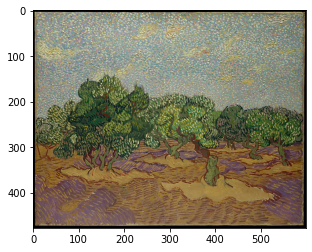

In [15]:
# :: ignore-cell ::
f = BytesIO()
result = download_image(metadata[1])
f.write(result["file_bytes"])
print(result["file_name"])
plt.figure()
plt.imshow(mpimg.imread(f, format="jpeg"))   

## Next lesson

All of the Margo notes we've seen so far affect how Margo Loader will import this notebook. The next one is a little different. It has no meaning to Margo Loader. It is meant to describe this notebook to other applications.

Below we create an assignment named `requirements.txt` which contains a list of Python packages required for this notebook to run. 

In the notebook [Generating requirements.txt.ipynb](Generating%20requirements.txt.ipynb), we will see how we can use this note to install these dependencies from the command line.

In [16]:
# Use Margo to assign a list of dependencies to a variable 'requirements.txt'

# :: requirements.txt[raw]:
# :: 'matplotlib==3.3.4
# ::requests==2.25.1' ::